# Notebook 01: Análisis Exploratorio de Datos (EDA)

**Prueba Técnica - Modelador Junior**

---

## Contexto del Problema

Se tiene un archivo Excel con:
- **Hoja "Real"**: Precios históricos reales de commodities
- **Hoja "Predicted"**: Predicciones de 5 modelos base diferentes

**Objetivo**: Crear un metamodelo que prediga la **dirección** (subida/bajada) de los precios cuando el horizonte de predicción es de **4 semanas**.

**Variable Objetivo**: `direccion = 1` si `precio_real > predicción`, `0` en caso contrario.

---

## 1. Imports y Configuración

In [32]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings

# Configuracion
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Semilla
np.random.seed(42)

print("Librerías cargadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Librerías cargadas correctamente
Pandas version: 2.3.3
NumPy version: 2.3.4


## 2. Carga de Datos

Cargamos ambas hojas del archivo Excel.

In [ ]:
excel_file = '../data/raw/ReportDataALL_20250404 (1).xlsx'

# Cargar ambas hojas
df_real = pd.read_excel(excel_file, sheet_name='Real')
df_predicted = pd.read_excel(excel_file, sheet_name='Predicted')

print("="*70)
print("DATOS CARGADOS EXITOSAMENTE")
print("="*70)
print(f"\nReal: {df_real.shape[0]:,} filas x {df_real.shape[1]} columnas")
print(f"Predicted: {df_predicted.shape[0]:,} filas x {df_predicted.shape[1]} columnas")

## 3. Análisis de Datos Reales

### 3.1 Inspección Básica

In [ ]:
print("="*70)
print("ANÁLISIS DE DATOS REALES")
print("="*70)

print("\nPrimeras 5 filas:")
display(df_real.head())

print("\nInformación general:")
df_real.info()

print("\nEstadísticas descriptivas:")
display(df_real.describe())

ANÁLISIS DE DATOS REALES

Primeras 5 filas:


,id_commodity,type,incoterm,origin,publication,date,value
0,1,Granular,fob,ME,as,2023-12-21,329.809933
1,1,Granular,fob,ME,as,2024-01-04,259.332539
2,1,Granular,fob,ME,as,2024-01-11,230.308861
3,1,Granular,fob,ME,as,2024-01-18,202.108218
4,1,Granular,fob,ME,as,2024-01-25,205.790308



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_commodity  66 non-null     int64         
 1   type          66 non-null     object        
 2   incoterm      66 non-null     object        
 3   origin        66 non-null     object        
 4   publication   66 non-null     object        
 5   date          66 non-null     datetime64[ns]
 6   value         66 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 3.7+ KB

Estadísticas descriptivas:


,id_commodity,date,value
count,66.0,66,66.000000
mean,1.0,2024-08-12 21:05:27.272727296,297.704099
min,1.0,2023-12-21 00:00:00,201.686031
25%,1.0,2024-04-19 18:00:00,241.796750
50%,1.0,2024-08-11 12:00:00,301.430924
75%,1.0,2024-12-03 06:00:00,354.020411
max,1.0,2025-04-03 00:00:00,392.385184
std,0.0,NaN,59.554823


In [ ]:
# Verificar valores nulos
print("\nValores nulos por columna:")
nulls = df_real.isnull().sum()
if nulls.sum() == 0:
    print("No hay valores nulos")
else:
    print(nulls[nulls > 0])

# Rango de fechas
print(f"\nRango temporal:")
print(f"   Inicio: {df_real['date'].min().strftime('%Y-%m-%d')}")
print(f"   Fin: {df_real['date'].max().strftime('%Y-%m-%d')}")
print(f"   Duración: {(df_real['date'].max() - df_real['date'].min()).days} días")

# Estadísticas de precios
print(f"\nEstadísticas de precios:")
print(f"   Media: ${df_real['value'].mean():.2f}")
print(f"   Mediana: ${df_real['value'].median():.2f}")
print(f"   Desv. Std: ${df_real['value'].std():.2f}")
print(f"   Mínimo: ${df_real['value'].min():.2f}")
print(f"   Máximo: ${df_real['value'].max():.2f}")
print(f"   Rango: ${df_real['value'].max() - df_real['value'].min():.2f}")


Valores nulos por columna:
No hay valores nulos

Rango temporal:
   Inicio: 2023-12-21
   Fin: 2025-04-03
   Duración: 469 días

Estadísticas de precios:
   Media: $297.70
   Mediana: $301.43
   Desv. Std: $59.55
   Mínimo: $201.69
   Máximo: $392.39
   Rango: $190.70


### 3.2 Visualización de Serie Temporal

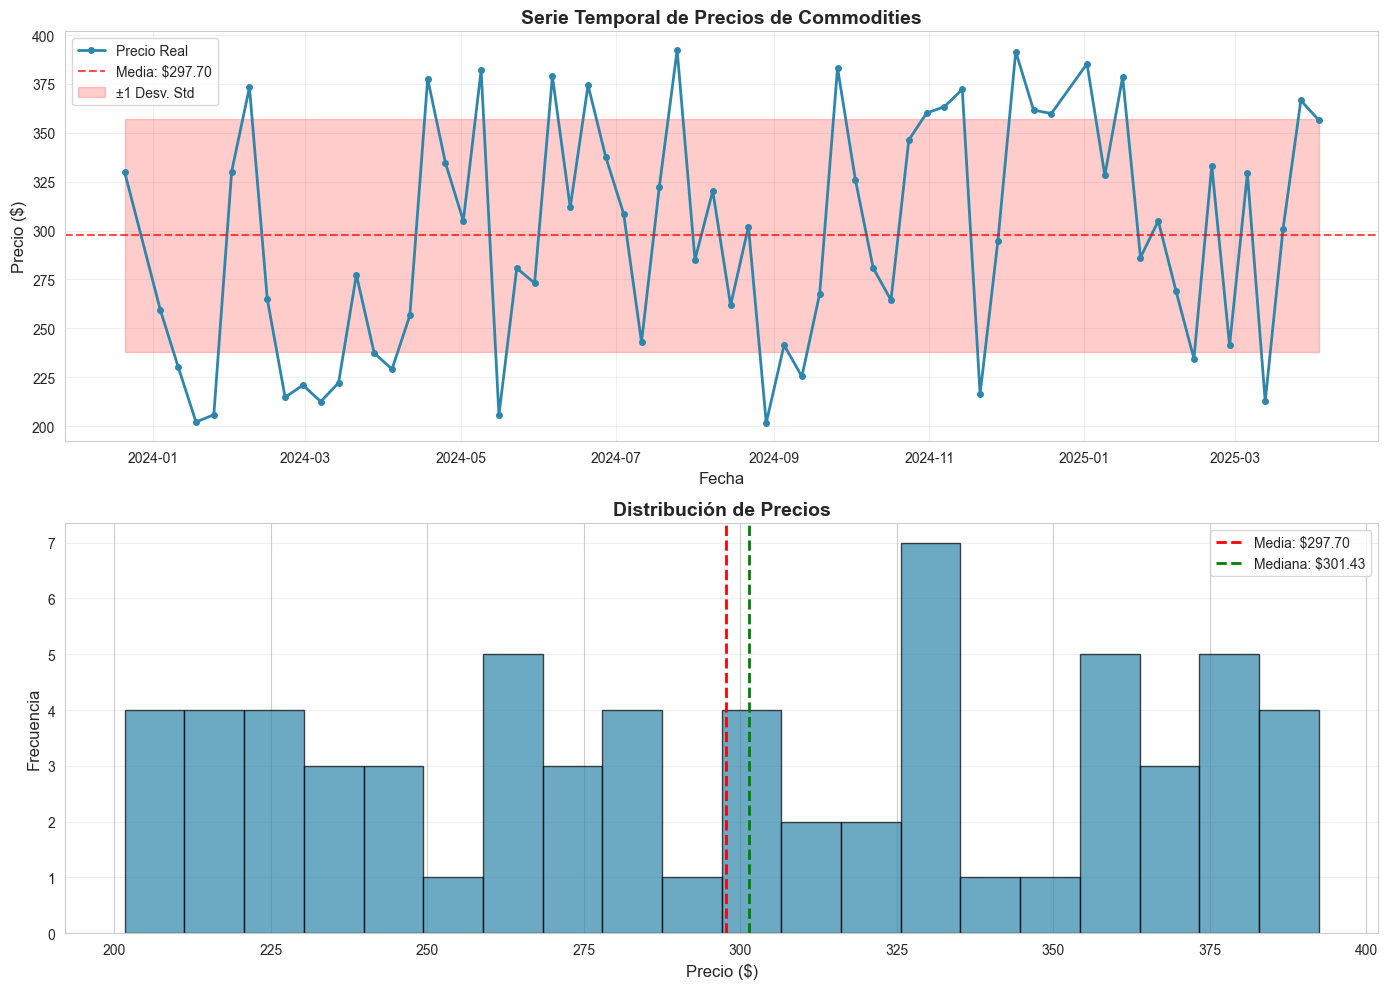


Grafico guardado


In [ ]:
# Grafico de serie temporal
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Grafico 1
axes[0].plot(df_real['date'], df_real['value'], marker='o', linestyle='-', 
             linewidth=2, markersize=4, color='#2E86AB', label='Precio Real')
axes[0].axhline(y=df_real['value'].mean(), color='red', linestyle='--', 
                linewidth=1.5, alpha=0.7, label=f'Media: ${df_real["value"].mean():.2f}')
axes[0].fill_between(df_real['date'], 
                      df_real['value'].mean() - df_real['value'].std(),
                      df_real['value'].mean() + df_real['value'].std(),
                      alpha=0.2, color='red', label='±1 Desv. Std')
axes[0].set_title('Serie Temporal de Precios de Commodities', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fecha', fontsize=12)
axes[0].set_ylabel('Precio ($)', fontsize=12)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Grafico 2
axes[1].hist(df_real['value'], bins=20, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[1].axvline(x=df_real['value'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Media: ${df_real["value"].mean():.2f}')
axes[1].axvline(x=df_real['value'].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Mediana: ${df_real["value"].median():.2f}')
axes[1].set_title('Distribución de Precios', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Precio ($)', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../outputs/figures/01_serie_temporal_precios.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrafico guardado")

## 4. Análisis de Predicciones

### 4.1 Inspección Básica

In [ ]:
print("="*70)
print("ANÁLISIS DE PREDICCIONES")
print("="*70)

print("\nPrimeras 5 filas:")
display(df_predicted.head())

print("\nInformación general:")
df_predicted.info()

print("\nEstadísticas descriptivas de predicciones:")
display(df_predicted[['prediction']].describe())

ANÁLISIS DE PREDICCIONES

Primeras 5 filas:


,id_commodity,type,incoterm,origin,publication,model,date_requested,date_prediction,prediction
0,1,Granular,fob,ME,as,LFHXNV,2024-12-05,2024-12-12,253.416915
1,1,Granular,fob,ME,as,LFHXNV,2024-12-05,2024-12-19,311.488395
2,1,Granular,fob,ME,as,LFHXNV,2024-12-05,2024-12-26,476.370463
3,1,Granular,fob,ME,as,LFHXNV,2024-12-05,2025-01-02,250.649314
4,1,Granular,fob,ME,as,LFHXNV,2024-12-05,2025-01-09,371.907196



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_commodity     1704 non-null   int64         
 1   type             1704 non-null   object        
 2   incoterm         1704 non-null   object        
 3   origin           1704 non-null   object        
 4   publication      1704 non-null   object        
 5   model            1704 non-null   object        
 6   date_requested   1704 non-null   datetime64[ns]
 7   date_prediction  1704 non-null   datetime64[ns]
 8   prediction       1704 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 119.9+ KB

Estadísticas descriptivas de predicciones:


,prediction
count,1704.000000
mean,346.797046
std,86.631491
min,200.846856
25%,270.811361
50%,342.587017
75%,423.276740
max,499.886932


In [ ]:
# Modelos disponibles
models = df_predicted['model'].unique()
print(f"\nModelos disponibles ({len(models)}):")
for i, model in enumerate(models, 1):
    count = len(df_predicted[df_predicted['model'] == model])
    print(f"   {i}. {model}: {count:,} predicciones")

# Verificar valores nulos
print("\nValores nulos por columna:")
nulls = df_predicted.isnull().sum()
if nulls.sum() == 0:
    print("No hay valores nulos")
else:
    print(nulls[nulls > 0])


Modelos disponibles (5):
   1. LFHXNV: 204 predicciones
   2. IPBG4J: 172 predicciones
   3. AA6KBD: 344 predicciones
   4. OBONV1: 672 predicciones
   5. HFWV8N: 312 predicciones

Valores nulos por columna:
No hay valores nulos


### 4.2 Análisis de Horizonte Temporal

In [ ]:
# Calcular diferencia en días
df_predicted['horizon_days'] = (df_predicted['date_prediction'] - df_predicted['date_requested']).dt.days

print("\nAnálisis de Horizonte Temporal:")
print(f"   Horizonte mínimo: {df_predicted['horizon_days'].min()} días")
print(f"   Horizonte máximo: {df_predicted['horizon_days'].max()} días")
print(f"   Horizonte medio: {df_predicted['horizon_days'].mean():.1f} días")
print(f"   Horizonte mediano: {df_predicted['horizon_days'].median():.0f} días")

# Distribución de horizontes
print("\nDistribución de horizontes temporales:")
horizon_dist = df_predicted['horizon_days'].value_counts().sort_index()
print(horizon_dist.head(10))


Análisis de Horizonte Temporal:
   Horizonte mínimo: 7 días
   Horizonte máximo: 84 días
   Horizonte medio: 37.0 días
   Horizonte mediano: 28 días

Distribución de horizontes temporales:
horizon_days
7     228
14    228
21    228
28    228
35     99
42     99
49     99
56     99
63     99
70     99
Name: count, dtype: int64


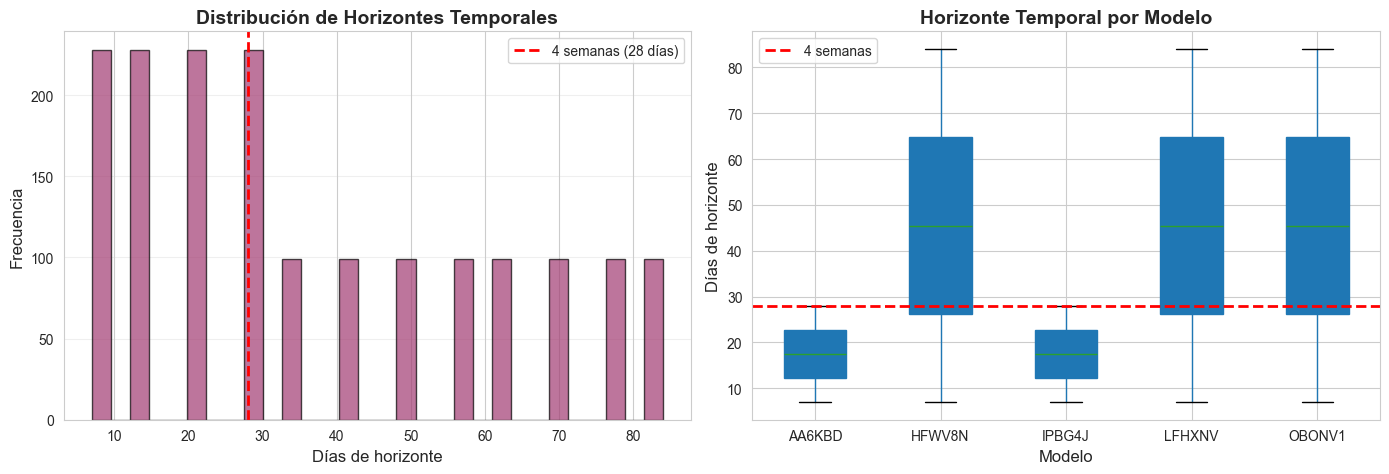


Grafico guardada


In [ ]:
# Visualizar distribución de horizontes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de horizontes
axes[0].hist(df_predicted['horizon_days'], bins=30, color='#A23B72', alpha=0.7, edgecolor='black')
axes[0].axvline(x=28, color='red', linestyle='--', linewidth=2, label='4 semanas (28 días)')
axes[0].set_title('Distribución de Horizontes Temporales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Días de horizonte', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Boxplot de horizontes por modelo
df_predicted.boxplot(column='horizon_days', by='model', ax=axes[1], patch_artist=True)
axes[1].axhline(y=28, color='red', linestyle='--', linewidth=2, label='4 semanas')
axes[1].set_title('Horizonte Temporal por Modelo', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Modelo', fontsize=12)
axes[1].set_ylabel('Días de horizonte', fontsize=12)
axes[1].legend()
plt.suptitle('')

plt.tight_layout()
plt.savefig('../outputs/figures/02_distribucion_horizontes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrafico guardada")

### 4.3 Filtrar Predicciones a 4 Semanas

Según los requisitos, necesitamos predicciones con horizonte de **4 semanas (28 días)**.
Usaremos una tolerancia de ±1 día (27-29 días).

In [ ]:
# Filtrar predicciones a 4 semanas (±1 día de tolerancia)
df_4weeks = df_predicted[
    (df_predicted['horizon_days'] >= 27) & 
    (df_predicted['horizon_days'] <= 29)
].copy()

print("\n" + "="*70)
print("FILTRADO A 4 SEMANAS")
print("="*70)
print(f"\nRegistros originales: {len(df_predicted):,}")
print(f"Registros filtrados (27-29 días): {len(df_4weeks):,}")
print(f"Porcentaje retenido: {len(df_4weeks)/len(df_predicted)*100:.1f}%")

# Verificar distribución por modelo
print("\nPredicciones por modelo (horizonte 4 semanas):")
model_counts = df_4weeks['model'].value_counts().sort_index()
for model, count in model_counts.items():
    print(f"   {model}: {count} predicciones")

# Fechas únicas de solicitud
unique_dates = df_4weeks['date_requested'].nunique()
print(f"\nFechas únicas de solicitud: {unique_dates}")
print(f"   (Esperamos ~{unique_dates} registros en el dataset final)")


FILTRADO A 4 SEMANAS

Registros originales: 1,704
Registros filtrados (27-29 días): 228
Porcentaje retenido: 13.4%

Predicciones por modelo (horizonte 4 semanas):
   AA6KBD: 86 predicciones
   HFWV8N: 26 predicciones
   IPBG4J: 43 predicciones
   LFHXNV: 17 predicciones
   OBONV1: 56 predicciones

Fechas únicas de solicitud: 56
   (Esperamos ~56 registros en el dataset final)


## 5. Análisis Comparativo: Predicciones vs Realidad

### 5.1 Merge de Datos

In [ ]:
# Merge predicciones con valores reales (en date_prediction)
df_comparison = df_4weeks.merge(
    df_real[['date', 'value']],
    left_on='date_prediction',
    right_on='date',
    how='left',
    suffixes=('', '_real')
)

# Renombrar columna
df_comparison = df_comparison.rename(columns={'value': 'value_real'})

# Calcular error
df_comparison['error'] = df_comparison['value_real'] - df_comparison['prediction']
df_comparison['abs_error'] = df_comparison['error'].abs()
df_comparison['pct_error'] = (df_comparison['error'] / df_comparison['value_real']) * 100

print("\n" + "="*70)
print("ANÁLISIS DE ERRORES DE PREDICCIÓN")
print("="*70)

# Verificar valores nulos después del merge
null_count = df_comparison['value_real'].isnull().sum()
if null_count > 0:
    print(f"\nAdvertencia: {null_count} predicciones sin valor real correspondiente")
    df_comparison = df_comparison.dropna(subset=['value_real'])
    print(f"   Registros después de eliminar nulos: {len(df_comparison)}")

print(f"\nDataset de comparación: {len(df_comparison)} registros")


ANÁLISIS DE ERRORES DE PREDICCIÓN

⚠️  Advertencia: 29 predicciones sin valor real correspondiente
   Registros después de eliminar nulos: 199

📊 Dataset de comparación: 199 registros


### 5.2 Errores por Modelo

In [ ]:
# Estadísticas de error por modelo
print("\nEstadísticas de Error por Modelo:\n")

error_stats = df_comparison.groupby('model').agg({
    'error': ['mean', 'std'],
    'abs_error': ['mean', 'median'],
    'pct_error': ['mean', 'std']
}).round(2)

error_stats.columns = ['Error_Medio', 'Error_Std', 'MAE', 'Mediana_AE', 'Error_%_Medio', 'Error_%_Std']
error_stats = error_stats.sort_values('MAE')

display(error_stats)

print("\nRanking de Modelos (por MAE):")
for i, (model, mae) in enumerate(error_stats['MAE'].items(), 1):
    print(f"   {i}. {model}: MAE = ${mae:.2f}")


Estadísticas de Error por Modelo:



,Error_Medio,Error_Std,MAE,Mediana_AE,Error_%_Medio,Error_%_Std
model,,,,,,
HFWV8N,-31.47,85.63,70.77,63.76,-12.02,28.99
AA6KBD,-37.05,98.51,84.99,77.20,-15.11,35.14
IPBG4J,-59.10,94.51,93.81,80.53,-22.49,34.20
OBONV1,-43.75,105.98,99.65,90.35,-18.48,38.04
LFHXNV,-50.09,126.29,111.47,100.35,-20.63,44.69



Ranking de Modelos (por MAE):
   1. HFWV8N: MAE = $70.77
   2. AA6KBD: MAE = $84.99
   3. IPBG4J: MAE = $93.81
   4. OBONV1: MAE = $99.65
   5. LFHXNV: MAE = $111.47


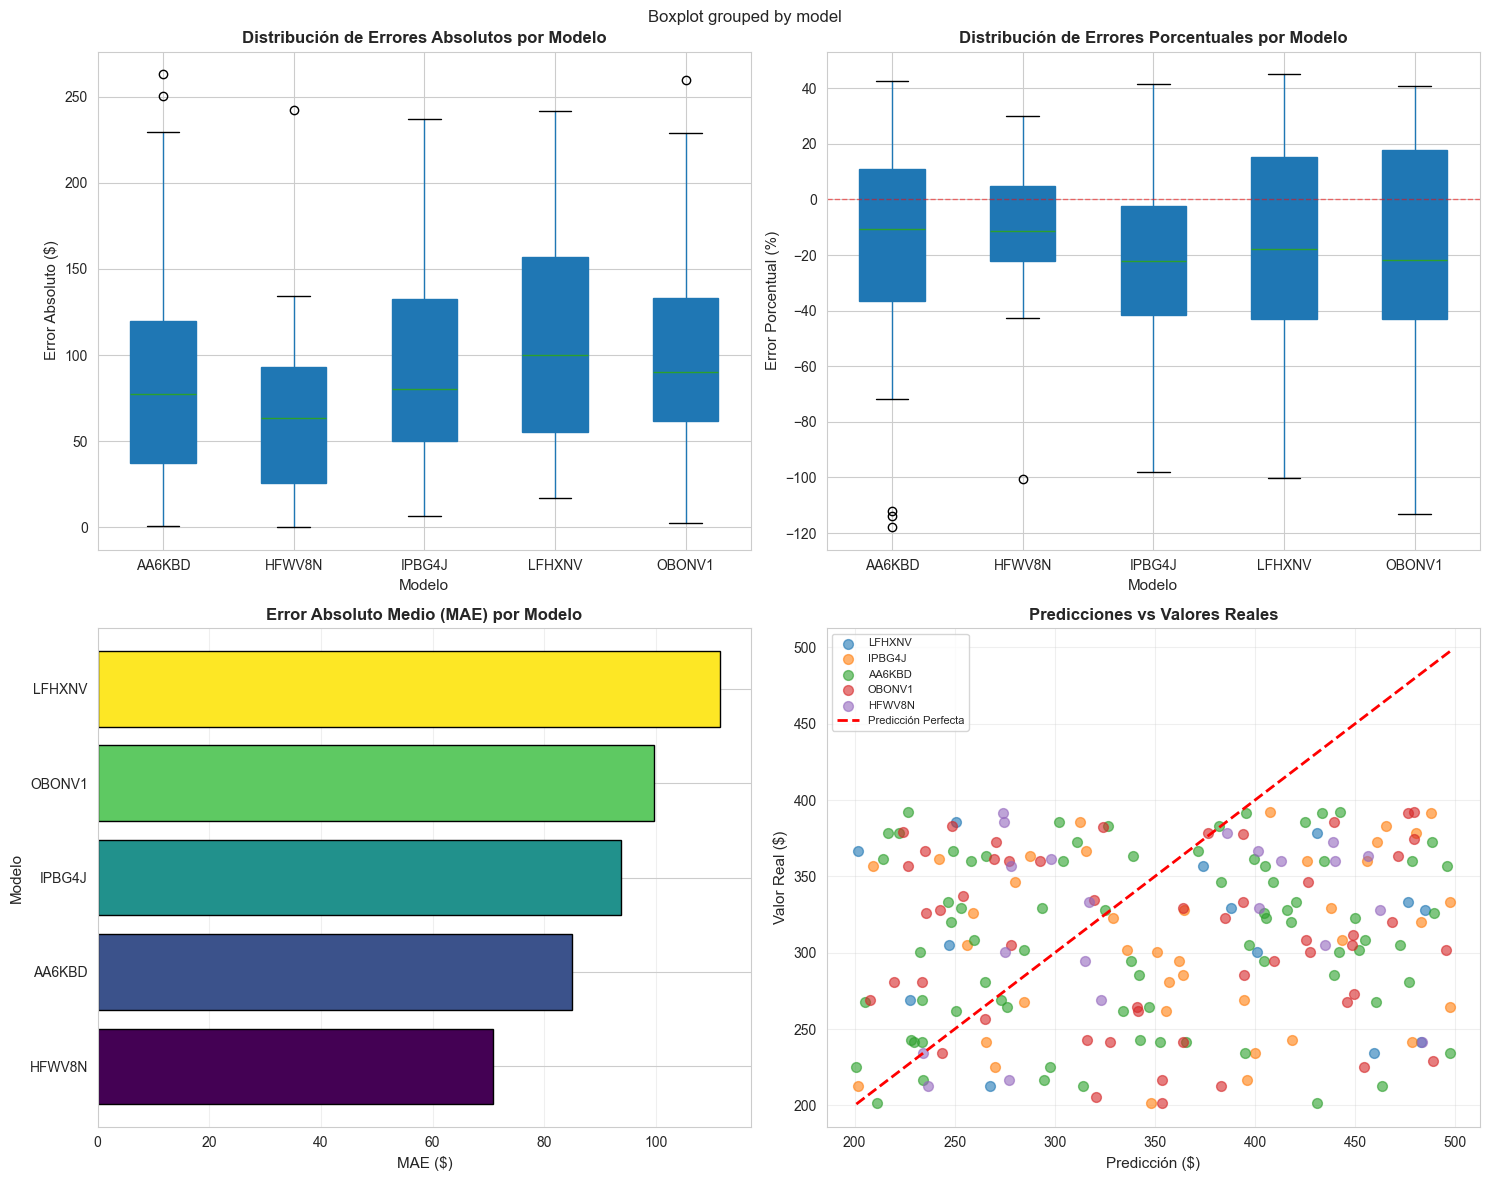


✓ Gráfico guardado en: outputs/figures/03_analisis_errores_modelos.png


In [ ]:
# Visualización de errores por modelo
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Grafico 1: Boxplot de errores absolutos
df_comparison.boxplot(column='abs_error', by='model', ax=axes[0, 0], patch_artist=True)
axes[0, 0].set_title('Distribución de Errores Absolutos por Modelo', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Modelo', fontsize=11)
axes[0, 0].set_ylabel('Error Absoluto ($)', fontsize=11)
plt.suptitle('')

# Grafico 2: Boxplot de errores porcentuales
df_comparison.boxplot(column='pct_error', by='model', ax=axes[0, 1], patch_artist=True)
axes[0, 1].set_title('Distribución de Errores Porcentuales por Modelo', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Modelo', fontsize=11)
axes[0, 1].set_ylabel('Error Porcentual (%)', fontsize=11)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)

# Grafico 3: MAE por modelo
mae_by_model = df_comparison.groupby('model')['abs_error'].mean().sort_values()
colors = plt.cm.viridis(np.linspace(0, 1, len(mae_by_model)))
axes[1, 0].barh(mae_by_model.index, mae_by_model.values, color=colors, edgecolor='black')
axes[1, 0].set_title('Error Absoluto Medio (MAE) por Modelo', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('MAE ($)', fontsize=11)
axes[1, 0].set_ylabel('Modelo', fontsize=11)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Grafico 4: Predicciones vs Valores Reales
for model in df_comparison['model'].unique():
    model_data = df_comparison[df_comparison['model'] == model]
    axes[1, 1].scatter(model_data['prediction'], model_data['value_real'], 
                      alpha=0.6, s=50, label=model)

# Línea diagonal (predicción perfecta)
min_val = min(df_comparison['prediction'].min(), df_comparison['value_real'].min())
max_val = max(df_comparison['prediction'].max(), df_comparison['value_real'].max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predicción Perfecta')
axes[1, 1].set_title('Predicciones vs Valores Reales', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Predicción ($)', fontsize=11)
axes[1, 1].set_ylabel('Valor Real ($)', fontsize=11)
axes[1, 1].legend(loc='best', fontsize=8)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/03_analisis_errores_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrafico Guardado")

## 6. Conclusiones Preliminares del EDA

In [ ]:
print("\n" + "="*70)
print("CONCLUSIONES PRELIMINARES")
print("="*70)

print("\n Datos Generales:")
print(f"   • {len(df_real)} registros de precios históricos")
print(f"   • {len(models)} modelos de predicción diferentes")
print(f"   • {unique_dates} fechas con predicciones a 4 semanas")
print(f"   • Rango de precios: ${df_real['value'].min():.2f} - ${df_real['value'].max():.2f}")

print("\n Comportamiento de Precios:")
price_change = ((df_real['value'].iloc[-1] - df_real['value'].iloc[0]) / df_real['value'].iloc[0]) * 100
print(f"   • Cambio total en el período: {price_change:+.2f}%")
print(f"   • Volatilidad (coef. variación): {(df_real['value'].std() / df_real['value'].mean()) * 100:.2f}%")

print("\n Performance de Modelos (Ranking por MAE):")
for i, (model, mae) in enumerate(error_stats['MAE'].items(), 1):
    error_pct = (mae / df_comparison[df_comparison['model'] == model]['value_real'].mean()) * 100
    print(f"   {i}. {model}: MAE=${mae:.2f} ({error_pct:.2f}% del precio medio)")

print("\n Insights Clave:")
best_model = error_stats['MAE'].idxmin()
worst_model = error_stats['MAE'].idxmax()
print(f"   • Mejor modelo individual: {best_model}")
print(f"   • Modelo con mayor error: {worst_model}")
print(f"   • Diferencia entre mejor y peor: ${error_stats['MAE'].max() - error_stats['MAE'].min():.2f}")

print("\n" + "="*70)


CONCLUSIONES PRELIMINARES

 Datos Generales:
   • 66 registros de precios históricos
   • 5 modelos de predicción diferentes
   • 56 fechas con predicciones a 4 semanas
   • Rango de precios: $201.69 - $392.39

 Comportamiento de Precios:
   • Cambio total en el período: +8.11%
   • Volatilidad (coef. variación): 20.00%

 Performance de Modelos (Ranking por MAE):
   1. HFWV8N: MAE=$70.77 (21.98% del precio medio)
   2. AA6KBD: MAE=$84.99 (27.52% del precio medio)
   3. IPBG4J: MAE=$93.81 (30.38% del precio medio)
   4. OBONV1: MAE=$99.65 (32.20% del precio medio)
   5. LFHXNV: MAE=$111.47 (35.86% del precio medio)

 Insights Clave:
   • Mejor modelo individual: HFWV8N
   • Modelo con mayor error: LFHXNV
   • Diferencia entre mejor y peor: $40.70
   • Oportunidad de mejora con metamodelo: Alta (variabilidad entre modelos)

